# Recommendation System in Restaurant

Dicoding

**Steps:**
1. Data Understanding
2. Univariate Exploratory Data Analysis
3. Data Preprocessing
4. Data Preparation
5. Model Development (Content Based Filtering)
6. Model Development (Collaborative Filtering)

In [ ]:
%mkdir /tmp/recommend
%cd /tmp/recommend

/tmp/recommend


In [ ]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/00232/RCdata.zip

--2021-10-17 03:49:30--  https://archive.ics.uci.edu/ml/machine-learning-databases/00232/RCdata.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 39674 (39K) [application/x-httpd-php]
Saving to: ‘RCdata.zip’

RCdata.zip          100%[===================>]  38.74K  --.-KB/s    in 0.1s    

2021-10-17 03:49:31 (290 KB/s) - ‘RCdata.zip’ saved [39674/39674]



In [ ]:
!unzip RCdata.zip

Archive:  RCdata.zip
  inflating: chefmozaccepts.csv      
  inflating: chefmozcuisine.csv      
  inflating: chefmozhours4.csv       
  inflating: chefmozparking.csv      
  inflating: geoplaces2.csv          
  inflating: rating_final.csv        
  inflating: README                  
  inflating: usercuisine.csv         
  inflating: userpayment.csv         
  inflating: userprofile.csv         


**Restaurants**

* chefmozaccepts.csv
* chefmozcuisine.csv
* chefmozhours4.csv
* chefmozparking.csv
* geoplaces2.csv

**Consumers**

* usercuisine.csv
* userpayment.csv
* userprofile.csv

**User-Item-Rating**

* rating_final.csv

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
accepts = pd.read_csv('chefmozaccepts.csv')
cuisine = pd.read_csv('chefmozcuisine.csv')
hours = pd.read_csv('chefmozhours4.csv')
parking = pd.read_csv('chefmozparking.csv')
geo = pd.read_csv('geoplaces2.csv', encoding='ISO-8859-1')

usercuisine = pd.read_csv('usercuisine.csv')
payment = pd.read_csv('userpayment.csv')
profile = pd.read_csv('userprofile.csv')

rating = pd.read_csv('rating_final.csv')

In [ ]:
print("Jumlah data pembayaran yang diterima restoran:", len(accepts.placeID.unique()))
print("Jumlah data masakan pada restoran:", len(cuisine.placeID.unique()))
print("Jumlah data waktu buka restoran:", len(hours.placeID.unique()))
print("Jumlah data lokasi restoran:", len(geo.placeID.unique()))

print("Jumlah data masakan penggua:", len(usercuisine.userID.unique()))
print("Jumlah data profil pengguna:", len(profile.userID.unique()))
print("Jumlah data penilaian yang diberikan pengguna:", len(rating.userID.unique()))

print("Jumlah data penilaian restoran:", len(rating.placeID.unique()))

Jumlah data pembayaran yang diterima restoran: 615
Jumlah data masakan pada restoran: 769
Jumlah data waktu buka restoran: 694
Jumlah data lokasi restoran: 130
Jumlah data masakan penggua: 138
Jumlah data profil pengguna: 138
Jumlah data penilaian yang diberikan pengguna: 138
Jumlah data penilaian restoran: 130


## Univariate Exploratory Data Analysis

### Accept Variable

In [ ]:
accepts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1314 entries, 0 to 1313
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   placeID   1314 non-null   int64 
 1   Rpayment  1314 non-null   object
dtypes: int64(1), object(1)
memory usage: 20.7+ KB


In [ ]:
print("Banyak data:", len(accepts.placeID.unique()))
print("Jenis Pembayaran yang diterima:", accepts.Rpayment.unique())

Banyak data: 615
Jenis Pembayaran yang diterima: ['cash' 'VISA' 'MasterCard-Eurocard' 'American_Express' 'bank_debit_cards'
 'checks' 'Discover' 'Carte_Blanche' 'Diners_Club' 'Visa'
 'Japan_Credit_Bureau' 'gift_certificates']


### Cuisine Variable

In [ ]:
cuisine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 916 entries, 0 to 915
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   placeID   916 non-null    int64 
 1   Rcuisine  916 non-null    object
dtypes: int64(1), object(1)
memory usage: 14.4+ KB


In [ ]:
print("Banyak tipe masakan:", len(cuisine.Rcuisine.unique()))
print("Tipe masakan:", cuisine.Rcuisine.unique())

Banyak tipe masakan: 59
Tipe masakan: ['Spanish' 'Italian' 'Latin_American' 'Mexican' 'Fast_Food' 'Burgers'
 'Dessert-Ice_Cream' 'Hot_Dogs' 'Steaks' 'Asian' 'International'
 'Mongolian' 'Vegetarian' 'Brazilian' 'Cafe-Coffee_Shop' 'Cafeteria'
 'Contemporary' 'Deli-Sandwiches' 'Diner' 'Japanese' 'Sushi' 'Seafood'
 'Chinese' 'Bar' 'Bar_Pub_Brewery' 'Pizzeria' 'Mediterranean' 'American'
 'Family' 'Caribbean' 'African' 'Breakfast-Brunch' 'Regional' 'Afghan'
 'Bakery' 'Game' 'Armenian' 'Vietnamese' 'Korean' 'Thai' 'Barbecue'
 'Polish' 'Dutch-Belgian' 'French' 'German' 'Southwestern' 'Persian'
 'Ethiopian' 'Juice' 'Soup' 'Continental-European' 'Greek' 'Southern'
 'Eastern_European' 'California' 'Bagels' 'Turkish' 'Organic-Healthy'
 'Fine_Dining']


### Profile

In [ ]:
print(profile.shape)

(138, 19)


In [ ]:
profile.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138 entries, 0 to 137
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   userID            138 non-null    object 
 1   latitude          138 non-null    float64
 2   longitude         138 non-null    float64
 3   smoker            138 non-null    object 
 4   drink_level       138 non-null    object 
 5   dress_preference  138 non-null    object 
 6   ambience          138 non-null    object 
 7   transport         138 non-null    object 
 8   marital_status    138 non-null    object 
 9   hijos             138 non-null    object 
 10  birth_year        138 non-null    int64  
 11  interest          138 non-null    object 
 12  personality       138 non-null    object 
 13  religion          138 non-null    object 
 14  activity          138 non-null    object 
 15  color             138 non-null    object 
 16  weight            138 non-null    int64  
 1

In [ ]:
profile.head()

,userID,latitude,longitude,smoker,drink_level,dress_preference,ambience,transport,marital_status,hijos,birth_year,interest,personality,religion,activity,color,weight,budget,height
0,U1001,22.139997,-100.978803,false,abstemious,informal,family,on foot,single,independent,1989,variety,thrifty-protector,none,student,black,69,medium,1.77
1,U1002,22.150087,-100.983325,false,abstemious,informal,family,public,single,independent,1990,technology,hunter-ostentatious,Catholic,student,red,40,low,1.87
2,U1003,22.119847,-100.946527,false,social drinker,formal,family,public,single,independent,1989,none,hard-worker,Catholic,student,blue,60,low,1.69
3,U1004,18.867000,-99.183000,false,abstemious,informal,family,public,single,independent,1940,variety,hard-worker,none,professional,green,44,medium,1.53
4,U1005,22.183477,-100.959891,false,abstemious,no preference,family,public,single,independent,1992,none,thrifty-protector,Catholic,student,black,65,medium,1.69


### Rating

In [ ]:
rating.head()

,userID,placeID,rating,food_rating,service_rating
0,U1077,135085,2,2,2
1,U1077,135038,2,2,1
2,U1077,132825,2,2,2
3,U1077,135060,1,2,2
4,U1068,135104,1,1,2


In [ ]:
rating.describe()

,placeID,rating,food_rating,service_rating
count,1161.000000,1161.000000,1161.000000,1161.000000
mean,134192.041344,1.199828,1.215332,1.090439
std,1100.916275,0.773282,0.792294,0.790844
min,132560.000000,0.000000,0.000000,0.000000
25%,132856.000000,1.000000,1.000000,0.000000
50%,135030.000000,1.000000,1.000000,1.000000
75%,135059.000000,2.000000,2.000000,2.000000
max,135109.000000,2.000000,2.000000,2.000000


In [ ]:
print("Jumlah userID:", len(rating.userID.unique()))
print("Jumlah placeID:", len(rating.placeID.unique()))
print("Jumlah data rating:", len(rating))

Jumlah userID: 138
Jumlah placeID: 130
Jumlah data rating: 1161


## Data Preprocessing

### Menggabungkan restoran

In [ ]:
# Menggabungkan seluruh placeID untuk kategori restaurant
resto_all = np.concatenate((
    accepts.placeID.unique(),
    cuisine.placeID.unique(),
    hours.placeID.unique(),
    parking.placeID.unique(),
    geo.placeID.unique()
))

# Mengurutkan data dan menghapus data duplikat
resto_all = np.sort(np.unique(resto_all))

print("Jumlah seluruh data restoran berdasarkan placeID:", len(resto_all))

Jumlah seluruh data restoran berdasarkan placeID: 938


### Menggabungkan user

In [ ]:
# Menggabungkan userID
user_all = np.concatenate((
    usercuisine.userID.unique(),
    payment.userID.unique(),
    profile.userID.unique()
))

# Mengurutkan dan menghapus duplikat
user_all = np.sort(np.unique(user_all))

print("Jumlah user keseluruhan:", len(user_all))

Jumlah user keseluruhan: 138


### Mengetahui jumlah rating

In [ ]:
# Menambahkan informasi accepts, geo, parking, hours ke dataframe resto_info
resto_info = pd.concat([accepts, geo, parking, hours])

# Menambahkan dataframe rating dengan resto_info berdasarkan placeID
resto = pd.merge(rating, resto_info, on='placeID', how='left')
resto

,userID,placeID,rating,food_rating,service_rating,Rpayment,latitude,longitude,the_geom_meter,name,address,city,state,country,fax,zip,alcohol,smoking_area,dress_code,accessibility,price,url,Rambience,franchise,area,other_services,parking_lot,hours,days
0,U1077,135085,2,2,2,cash,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,U1077,135085,2,2,2,NaN,22.150802,-100.982680,0101000020957F00009F823DA6094858C18A2D4D37F9A4...,Tortas Locas Hipocampo,Venustiano Carranza 719 Centro,San Luis Potosi,SLP,Mexico,?,78000,No_Alcohol_Served,not permitted,informal,no_accessibility,medium,?,familiar,f,closed,none,NaN,NaN,NaN
2,U1077,135085,2,2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,public,NaN,NaN
3,U1077,135085,2,2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,00:00-00:00;,Mon;Tue;Wed;Thu;Fri;
4,U1077,135085,2,2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,00:00-00:00;,Sat;
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8073,U1068,132660,0,0,0,NaN,23.752943,-99.164679,0101000020957F00003D7905C9DC8157C13FCD1AB7334E...,carnitas mata calle Emilio Portes Gil,Emilio Portes Gil,victoria,tamaulipas,?,?,?,No_Alcohol_Served,none,informal,completely,low,?,familiar,f,closed,none,NaN,NaN,NaN
8074,U1068,132660,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,none,NaN,NaN
8075,U1068,132660,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,00:00-23:30;,Mon;Tue;Wed;Thu;Fri;
8076,U1068,132660,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,00:00-23:30;,Sat;


In [ ]:
# Cek missing values
resto.isna().sum()

userID               0
placeID              0
rating               0
food_rating          0
service_rating       0
Rpayment          5781
latitude          6917
longitude         6917
the_geom_meter    6917
name              6917
address           6917
city              6917
state             6917
country           6917
fax               6917
zip               6917
alcohol           6917
smoking_area      6917
dress_code        6917
accessibility     6917
price             6917
url               6917
Rambience         6917
franchise         6917
area              6917
other_services    6917
parking_lot       6917
hours             4619
days              4619
dtype: int64

In [ ]:
# Menghitung jumlah rating, food rating, dan service kemudian menggabungkannya berdasarkan placeID
resto.groupby('placeID').sum()

,rating,food_rating,service_rating,latitude,longitude
placeID,,,,,
132560,12,24,6,95.009216,-396.667653
132561,15,20,20,94.907276,-396.506024
132564,25,25,30,94.923698,-396.580739
132572,90,90,84,332.124707,-1514.890677
132583,24,24,30,75.689162,-396.937328
...,...,...,...,...,...
135088,36,42,36,113.256068,-595.319338
135104,48,80,48,166.270875,-694.179039
135106,96,96,96,221.497088,-1009.760928


### Menggabungkan data dengan fitur nama resto

In [ ]:
# Mendifinisikan dataframe rating ke dalam variable all_resto_rate
all_resto_rate = rating
all_resto_rate

,userID,placeID,rating,food_rating,service_rating
0,U1077,135085,2,2,2
1,U1077,135038,2,2,1
2,U1077,132825,2,2,2
3,U1077,135060,1,2,2
4,U1068,135104,1,1,2
...,...,...,...,...,...
1156,U1043,132630,1,1,1
1157,U1011,132715,1,1,0
1158,U1068,132733,1,1,0
1159,U1068,132594,1,1,1


In [ ]:
# Menggabungkan all_resto_rate dengan dataframe geo berdasarkan placeID
all_resto_name = pd.merge(all_resto_rate, geo[['placeID', 'name']], on='placeID', how='left')

# Print dataframe all_resto_name
all_resto_name

,userID,placeID,rating,food_rating,service_rating,name
0,U1077,135085,2,2,2,Tortas Locas Hipocampo
1,U1077,135038,2,2,1,Restaurant la Chalita
2,U1077,132825,2,2,2,puesto de tacos
3,U1077,135060,1,2,2,Restaurante Marisco Sam
4,U1068,135104,1,1,2,vips
...,...,...,...,...,...,...
1156,U1043,132630,1,1,1,palomo tec
1157,U1011,132715,1,1,0,tacos de la estacion
1158,U1068,132733,1,1,0,Little Cesarz
1159,U1068,132594,1,1,1,tacos de barbacoa enfrente del Tec


### Menggabungkan data dengan fitur masakan resto

In [ ]:
# Menggabungkan dataframe cuisine dengan all_resto_name dan memasukannya ke dalam variable all_resto
all_resto = pd.merge(all_resto_name, cuisine, on='placeID', how='left')
all_resto

,userID,placeID,rating,food_rating,service_rating,name,Rcuisine
0,U1077,135085,2,2,2,Tortas Locas Hipocampo,Fast_Food
1,U1077,135038,2,2,1,Restaurant la Chalita,NaN
2,U1077,132825,2,2,2,puesto de tacos,Mexican
3,U1077,135060,1,2,2,Restaurante Marisco Sam,Seafood
4,U1068,135104,1,1,2,vips,Mexican
...,...,...,...,...,...,...,...
1326,U1043,132630,1,1,1,palomo tec,Mexican
1327,U1011,132715,1,1,0,tacos de la estacion,Mexican
1328,U1068,132733,1,1,0,Little Cesarz,Pizzeria
1329,U1068,132594,1,1,1,tacos de barbacoa enfrente del Tec,Mexican


## Data Preparation

### Mengatasi missing values

In [ ]:
all_resto.isnull().sum()

userID              0
placeID             0
rating              0
food_rating         0
service_rating      0
name                0
Rcuisine          288
dtype: int64

In [ ]:
all_resto_clean = all_resto.dropna()
all_resto_clean

,userID,placeID,rating,food_rating,service_rating,name,Rcuisine
0,U1077,135085,2,2,2,Tortas Locas Hipocampo,Fast_Food
2,U1077,132825,2,2,2,puesto de tacos,Mexican
3,U1077,135060,1,2,2,Restaurante Marisco Sam,Seafood
4,U1068,135104,1,1,2,vips,Mexican
5,U1068,132740,0,0,0,Carreton de Flautas y Migadas,Mexican
...,...,...,...,...,...,...,...
1325,U1043,132732,1,1,1,Taqueria EL amigo,Mexican
1326,U1043,132630,1,1,1,palomo tec,Mexican
1327,U1011,132715,1,1,0,tacos de la estacion,Mexican
1328,U1068,132733,1,1,0,Little Cesarz,Pizzeria


In [ ]:
all_resto_clean.isnull().sum()

userID            0
placeID           0
rating            0
food_rating       0
service_rating    0
name              0
Rcuisine          0
dtype: int64

### Menyamakan jenis masakan

In [ ]:
# Mengurutkan resto berdasarkan placeID kemudian memasukkannya ke fix_resto
fix_resto = all_resto_clean.sort_values('placeID', ascending=True)
fix_resto

,userID,placeID,rating,food_rating,service_rating,name,Rcuisine
1303,U1087,132560,1,2,1,puesto de gorditas,Regional
1288,U1050,132560,0,2,0,puesto de gorditas,Regional
14,U1067,132560,1,0,0,puesto de gorditas,Regional
42,U1082,132560,0,0,0,puesto de gorditas,Regional
1052,U1013,132572,1,1,0,Cafe Chaires,Cafeteria
...,...,...,...,...,...,...,...
438,U1024,135106,1,1,1,El Rincón de San Francisco,Mexican
178,U1020,135109,2,2,1,Paniroles,Italian
1071,U1041,135109,1,2,1,Paniroles,Italian
99,U1030,135109,0,0,0,Paniroles,Italian


In [ ]:
# Cek jumlah fix_resto
len(fix_resto.placeID.unique())

95

In [ ]:
# Mengecek kategori masakan unique
fix_resto.Rcuisine.unique()

array(['Regional', 'Cafeteria', 'American', 'Mexican', 'Fast_Food',
       'Italian', 'Armenian', 'Pizzeria', 'Japanese', 'Vietnamese',
       'Family', 'International', 'Game', 'Burgers', 'Bakery', 'Bar',
       'Breakfast-Brunch', 'Bar_Pub_Brewery', 'Mediterranean',
       'Cafe-Coffee_Shop', 'Contemporary', 'Seafood', 'Chinese'],
      dtype=object)

In [ ]:
fix_resto[fix_resto['Rcuisine'] == 'Game']

,userID,placeID,rating,food_rating,service_rating,name,Rcuisine
781,U1015,132851,1,1,1,KFC,Game
509,U1052,132851,1,0,2,KFC,Game
708,U1008,132851,1,1,1,KFC,Game
770,U1037,132851,2,2,1,KFC,Game
574,U1069,132851,1,0,0,KFC,Game
1188,U1131,132851,2,2,2,KFC,Game
764,U1111,132851,2,1,0,KFC,Game


In [ ]:
fix_resto[fix_resto['name'] == 'KFC']

,userID,placeID,rating,food_rating,service_rating,name,Rcuisine
781,U1015,132851,1,1,1,KFC,Game
508,U1052,132851,1,0,2,KFC,American
780,U1015,132851,1,1,1,KFC,American
509,U1052,132851,1,0,2,KFC,Game
708,U1008,132851,1,1,1,KFC,Game
707,U1008,132851,1,1,1,KFC,American
770,U1037,132851,2,2,1,KFC,Game
769,U1037,132851,2,2,1,KFC,American
1187,U1131,132851,2,2,2,KFC,American
574,U1069,132851,1,0,0,KFC,Game


In [ ]:
# Mengubah nama kategori dari 'Game' menjadi 'American'
fix_resto = fix_resto.replace('Game', 'American')
fix_resto[fix_resto['name'] == 'KFC']

,userID,placeID,rating,food_rating,service_rating,name,Rcuisine
781,U1015,132851,1,1,1,KFC,American
508,U1052,132851,1,0,2,KFC,American
780,U1015,132851,1,1,1,KFC,American
509,U1052,132851,1,0,2,KFC,American
708,U1008,132851,1,1,1,KFC,American
707,U1008,132851,1,1,1,KFC,American
770,U1037,132851,2,2,1,KFC,American
769,U1037,132851,2,2,1,KFC,American
1187,U1131,132851,2,2,2,KFC,American
574,U1069,132851,1,0,0,KFC,American


In [ ]:
# Membuat variable preparation yang berisikan fix_resto yang telah diurutkan
preparation = fix_resto
preparation.sort_values('placeID')

,userID,placeID,rating,food_rating,service_rating,name,Rcuisine
1303,U1087,132560,1,2,1,puesto de gorditas,Regional
1288,U1050,132560,0,2,0,puesto de gorditas,Regional
14,U1067,132560,1,0,0,puesto de gorditas,Regional
42,U1082,132560,0,0,0,puesto de gorditas,Regional
184,U1055,132572,2,2,2,Cafe Chaires,Cafeteria
...,...,...,...,...,...,...,...
1224,U1002,135106,1,1,1,El Rincón de San Francisco,Mexican
99,U1030,135109,0,0,0,Paniroles,Italian
178,U1020,135109,2,2,1,Paniroles,Italian
1071,U1041,135109,1,2,1,Paniroles,Italian


In [ ]:
# Membuang data duplikat pada variable preparation
preparation = preparation.drop_duplicates("placeID")
preparation

,userID,placeID,rating,food_rating,service_rating,name,Rcuisine
1303,U1087,132560,1,2,1,puesto de gorditas,Regional
1052,U1013,132572,1,1,0,Cafe Chaires,Cafeteria
168,U1118,132583,0,0,0,McDonalds Centro,American
24,U1107,132584,2,2,2,Gorditas Dona Tota,Mexican
1329,U1068,132594,1,1,1,tacos de barbacoa enfrente del Tec,Mexican
...,...,...,...,...,...,...,...
681,U1095,135086,1,2,1,Mcdonalds Parque Tangamanga,Fast_Food
175,U1020,135088,1,2,0,Cafeteria cenidet,Cafeteria
4,U1068,135104,1,1,2,vips,Mexican
488,U1004,135106,2,2,2,El Rincón de San Francisco,Mexican


### Konversi series data menjadi list data

In [ ]:
# Mengonversi 'placeID' series menjadi list
resto_id = preparation['placeID'].tolist()

# Mengonversi 'Name' series menjadi list
resto_name = preparation['name'].tolist()

# Mengonversi 'Rcuisine' menjadi list
resto_cuisine = preparation['Rcuisine'].tolist()

print(len(resto_id))
print(len(resto_name))
print(len(resto_cuisine))

95
95
95


### Membuat dictionary untuk menentukan key-value pada data

In [ ]:
resto_new = pd.DataFrame({
    'id' : resto_id,
    'resto_name' : resto_name,
    'cuisine' : resto_cuisine
})

resto_new

,id,resto_name,cuisine
0,132560,puesto de gorditas,Regional
1,132572,Cafe Chaires,Cafeteria
2,132583,McDonalds Centro,American
3,132584,Gorditas Dona Tota,Mexican
4,132594,tacos de barbacoa enfrente del Tec,Mexican
...,...,...,...
90,135086,Mcdonalds Parque Tangamanga,Fast_Food
91,135088,Cafeteria cenidet,Cafeteria
92,135104,vips,Mexican
93,135106,El Rincón de San Francisco,Mexican


## Pemodelan (Content Based Filtering)

In [ ]:
data = resto_new

### TF-IDF Vectorizer

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Inisialisasi TfidfVectorizer
tf = TfidfVectorizer()

# Melakukan perhitungan idf pada data cuisine
tf.fit(data['cuisine'])

# Mapping array dari fitur index integer ke fitur nama
tf.get_feature_names()

['american',
 'armenian',
 'bar',
 'bar_pub_brewery',
 'breakfast',
 'brunch',
 'burgers',
 'cafe',
 'cafeteria',
 'chinese',
 'coffee_shop',
 'contemporary',
 'family',
 'fast_food',
 'international',
 'italian',
 'japanese',
 'mexican',
 'pizzeria',
 'regional',
 'seafood',
 'vietnamese']

In [ ]:
# Melakukan fit lalu mentransformasikannya ke bentuk matrix
tfidf_matrix = tf.fit_transform(data['cuisine'])

# Melihat ukuran matrix tfidf
tfidf_matrix.shape

(95, 22)

In [ ]:
tfidf_matrix

<95x22 sparse matrix of type '<class 'numpy.float64'>'
	with 97 stored elements in Compressed Sparse Row format>

In [ ]:
# Mengubah vektor tf-idf ke bentuk matrix dengan to_dense()
tfidf_matrix.todense()

matrix([[0., 0., 0., ..., 1., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
# Membuat dataframe untuk melihat tf-idf matrix
# Kolom berisikan jenis masakan
# Baris berisikan nama resto

pd.DataFrame(
    tfidf_matrix.todense(),
    columns = tf.get_feature_names(),
    index = data.resto_name
).sample(22, axis=1).sample(10, axis=0)

,vietnamese,seafood,mexican,international,armenian,bar_pub_brewery,cafe,coffee_shop,regional,family,contemporary,brunch,italian,bar,chinese,cafeteria,burgers,breakfast,japanese,pizzeria,american,fast_food
resto_name,,,,,,,,,,,,,,,,,,,,,,
Restaurante Bar Fu-hao,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Log Yin,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
La Fontana Pizza Restaurante and Cafe,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
Restaurante Marisco Sam,0.0,1.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Gorditas Dona Tota,0.0,0.0,1.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Restaurante la Cantina,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Cafe Chaires,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
VIPS,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
Preambulo Wifi Zone Cafe,0.0,0.0,0.0,0.0,0.0,0.0,0.707107,0.707107,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Cosine Similarity

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

# Menghitung cosine similarity pada matrix tf-idf
cosine_sim = cosine_similarity(tfidf_matrix)
cosine_sim

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 1., 0.],
       [0., 0., 0., ..., 1., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [ ]:
# Membuat dataframe dari variable cosine_sim dengan baris dan kolom nama resto
cosine_sim_df = pd.DataFrame(cosine_sim, index=data['resto_name'], columns=data['resto_name'])
print("Shape:", cosine_sim_df.shape)

# Melihat similarity matrix pada setiap resto
cosine_sim_df.sample(5, axis=1).sample(10, axis=0)

Shape: (95, 95)


resto_name,Pollo_Frito_Buenos_Aires,el lechon potosino,shi ro ie,Cenaduria El RincÃ³n de Tlaquepaque,VIPS
resto_name,,,,,
Restaurante Tiberius,0.0,0.0,0.0,0.0,0.0
Mikasa,0.0,0.0,1.0,0.0,0.0
Gorditas Dona Tota,0.0,0.0,0.0,1.0,0.0
Mariscos Tia Licha,0.0,0.0,0.0,0.0,0.0
Gorditas Dona Tota,0.0,0.0,0.0,1.0,0.0
pizza clasica,1.0,0.0,0.0,0.0,0.0
Restaurant de Mariscos de Picon,0.0,0.0,0.0,0.0,0.0
Cenaduria El RincÃ³n de Tlaquepaque,0.0,0.0,0.0,1.0,0.0
Cafeteria y Restaurant El Pacifico,0.0,0.0,0.0,0.0,0.0


In [ ]:
def resto_recommendations(nama_resto, similarity_data=cosine_sim_df, items=data[['resto_name', 'cuisine']], k=5):
    """
    Rekomendasi Resto berdasarkan kemiripan dataframe
 
    Parameter:
    ---
    nama_resto : tipe data string (str)
                Nama Restoran (index kemiripan dataframe)
    similarity_data : tipe data pd.DataFrame (object)
                      Kesamaan dataframe, simetrik, dengan resto sebagai 
                      indeks dan kolom
    items : tipe data pd.DataFrame (object)
            Mengandung kedua nama dan fitur lainnya yang digunakan untuk mendefinisikan kemiripan
    k : tipe data integer (int)
        Banyaknya jumlah rekomendasi yang diberikan
    ---
 
 
    Pada index ini, kita mengambil k dengan nilai similarity terbesar 
    pada index matrix yang diberikan (i).
    """
    
    # Mengambil data dengan argpartition untuk partisi secara tidak langsung
    # DataFrame menjadi numpy
    # Range(start, stop, step)
    index = similarity_data.loc[:, nama_resto].to_numpy().argpartition(range(-1, -k, -1))

    # Mengambil data dengan similarity terbesar dari index
    closest = similarity_data.columns[index[-1:-(k+2):-1]]

    # Drop nama_resto agar nama yang dicari tida dalam rekomendasi
    closest = closest.drop(nama_resto, errors='ignore')

    return pd.DataFrame(closest).merge(items).head(k)


In [ ]:
data[data.resto_name.eq('KFC')] 

,id,resto_name,cuisine
31,132851,KFC,American


In [ ]:
resto_recommendations('KFC')

,resto_name,cuisine
0,VIPS,American
1,tacos los volcanes,American
2,Pizzeria Julios,American
3,Sirlone,International
4,McDonalds Centro,American


## Modelling dengan Collaborative Filtering

### Data Understanding

In [ ]:
# Import Library
from tensorflow.keras import layers
import matplotlib.pyplot as plt
from tensorflow import keras
from zipfile import ZipFile
from pathlib import Path
import tensorflow as tf
import pandas as pd
import numpy as np

In [ ]:
# Membaca dataset
df = rating
df

,userID,placeID,rating,food_rating,service_rating
0,U1077,135085,2,2,2
1,U1077,135038,2,2,1
2,U1077,132825,2,2,2
3,U1077,135060,1,2,2
4,U1068,135104,1,1,2
...,...,...,...,...,...
1156,U1043,132630,1,1,1
1157,U1011,132715,1,1,0
1158,U1068,132733,1,1,0
1159,U1068,132594,1,1,1


### Data Preparation

In [ ]:
# Mengubah userID menjadi list tanpa nilai yang sama
user_ids = df['userID'].unique().tolist()
print("List userID:", user_ids)

# Melakukan encoding userID
user_to_user_encoded = {x: i for i, x in enumerate(user_ids)}
print("Encoded userID:", user_to_user_encoded)

# Melakukan proses encoding angka ke userID
user_encoded_to_user = {i: x for i, x in enumerate(user_ids)}
print("Encoded angka ke userID:", user_encoded_to_user)

List userID: ['U1077', 'U1068', 'U1067', 'U1103', 'U1107', 'U1044', 'U1070', 'U1031', 'U1082', 'U1023', 'U1060', 'U1015', 'U1123', 'U1021', 'U1026', 'U1083', 'U1108', 'U1012', 'U1093', 'U1030', 'U1066', 'U1127', 'U1017', 'U1100', 'U1133', 'U1118', 'U1072', 'U1080', 'U1063', 'U1074', 'U1117', 'U1020', 'U1051', 'U1055', 'U1053', 'U1035', 'U1064', 'U1081', 'U1001', 'U1014', 'U1088', 'U1056', 'U1134', 'U1106', 'U1126', 'U1124', 'U1018', 'U1125', 'U1119', 'U1076', 'U1022', 'U1094', 'U1116', 'U1105', 'U1075', 'U1007', 'U1115', 'U1024', 'U1132', 'U1005', 'U1120', 'U1004', 'U1037', 'U1052', 'U1036', 'U1038', 'U1071', 'U1114', 'U1084', 'U1049', 'U1019', 'U1069', 'U1113', 'U1104', 'U1079', 'U1045', 'U1009', 'U1016', 'U1047', 'U1095', 'U1034', 'U1078', 'U1099', 'U1008', 'U1040', 'U1121', 'U1110', 'U1042', 'U1013', 'U1054', 'U1111', 'U1128', 'U1062', 'U1101', 'U1135', 'U1032', 'U1048', 'U1092', 'U1085', 'U1109', 'U1102', 'U1098', 'U1046', 'U1122', 'U1138', 'U1033', 'U1089', 'U1003', 'U1091', 'U102

In [ ]:
# Mengubah placeID menjadi list dan menghilangkan duplicate
resto_ids = df['placeID'].unique().tolist()

# Melakukan encoding placeID
resto_to_resto_encoded = {x: i for i, x in enumerate(resto_ids)}

# Melakukan proses encoding angka ke placeID
resto_encoded_to_resto = {i: x for i, x in enumerate(resto_ids)} 

In [ ]:
# Mapping userID ke dataframe user
df['user'] = df['userID'].map(user_to_user_encoded)

# Mapping placeID ke dataframe resto
df['resto'] = df['placeID'].map(resto_to_resto_encoded)

In [ ]:
# Jumlah user
num_users = len(user_to_user_encoded)
print(num_users)

# Jumlah resto
num_resto = len(resto_encoded_to_resto)
print(num_resto)

# Rating menjadi float
df['rating'] = df['rating'].values.astype(np.float32)

# Nilai minimum rating
min_rating = min(df['rating'])

# Nilai maksimal rating
max_rating = max(df['rating'])

print("Number of User: {}, Number of Resto: {}, Min Rating: {}, Max Rating: {}".format(
    num_users, num_resto, min_rating, max_rating
))

138
130
Number of User: 138, Number of Resto: 130, Min Rating: 0.0, Max Rating: 2.0


### Split data train dan validate

In [ ]:
# Mengacak dataset
df = df.sample(frac=1, random_state=21)
df

,userID,placeID,rating,food_rating,service_rating,user,resto
847,U1027,135052,1.0,1,1,109,81
816,U1089,132951,1.0,1,1,106,125
755,U1085,132825,2.0,2,2,98,2
283,U1124,135032,1.0,1,1,45,35
292,U1125,135043,1.0,1,2,47,79
...,...,...,...,...,...,...,...
1144,U1065,132654,1.0,1,1,133,60
368,U1007,135057,1.0,1,2,55,78
48,U1123,132733,1.0,2,1,12,10
772,U1098,132856,1.0,2,1,101,109


In [ ]:
# Menjadikan variable x terdiri dari user dan resto
X = df[['user', 'resto']].values

# Menjadikan variable y untuk rating
y = df['rating'].apply(lambda X: (X - min_rating) / (max_rating - min_rating)).values

# Membagi data
train_indices = int(0.8 * df.shape[0])

X_train, X_val, y_train, y_val = (
    X[:train_indices],
    X[:train_indices:],
    y[:train_indices],
    y[:train_indices:],
)

In [ ]:
print(X, y)

[[109  81]
 [106 125]
 [ 98   2]
 ...
 [ 12  10]
 [101 109]
 [117 103]] [0.5 0.5 1.  ... 0.5 0.5 0.5]


### Training

In [ ]:
class RecommenderNet(tf.keras.Model):
 
  # Insialisasi fungsi
  def __init__(self, num_users, num_resto, embedding_size, **kwargs):
    super(RecommenderNet, self).__init__(**kwargs)
    self.num_users = num_users
    self.num_resto = num_resto
    self.embedding_size = embedding_size
    self.user_embedding = layers.Embedding( # layer embedding user
        num_users,
        embedding_size,
        embeddings_initializer = 'he_normal',
        embeddings_regularizer = keras.regularizers.l2(1e-6)
    )
    self.user_bias = layers.Embedding(num_users, 1) # layer embedding user bias
    self.resto_embedding = layers.Embedding( # layer embeddings resto
        num_resto,
        embedding_size,
        embeddings_initializer = 'he_normal',
        embeddings_regularizer = keras.regularizers.l2(1e-6)
    )
    self.resto_bias = layers.Embedding(num_resto, 1) # layer embedding resto bias
 
  def call(self, inputs):
    user_vector = self.user_embedding(inputs[:,0]) # memanggil layer embedding 1
    user_bias = self.user_bias(inputs[:, 0]) # memanggil layer embedding 2
    resto_vector = self.resto_embedding(inputs[:, 1]) # memanggil layer embedding 3
    resto_bias = self.resto_bias(inputs[:, 1]) # memanggil layer embedding 4
 
    dot_user_resto = tf.tensordot(user_vector, resto_vector, 2) 
 
    x = dot_user_resto + user_bias + resto_bias
    
    return tf.nn.sigmoid(x) # activation sigmoid

In [ ]:
model = RecommenderNet(num_users, num_resto, 50)

model.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = keras.optimizers.Adam(learning_rate=0.001),
    metrics = [tf.keras.metrics.RootMeanSquaredError()]
)

In [ ]:
history = model.fit(
    x = X_train, 
    y = y_train,
    batch_size = 8,
    epochs = 100, 
    validation_data = (X_val, y_val)
)

Epoch 1/100
116/116 [==============================] - 1s 4ms/step - loss: 0.7059 - root_mean_squared_error: 0.4073 - val_loss: 0.6817 - val_root_mean_squared_error: 0.3925
Epoch 2/100
116/116 [==============================] - 0s 2ms/step - loss: 0.6865 - root_mean_squared_error: 0.3953 - val_loss: 0.6644 - val_root_mean_squared_error: 0.3815
Epoch 3/100
116/116 [==============================] - 0s 2ms/step - loss: 0.6638 - root_mean_squared_error: 0.3812 - val_loss: 0.6549 - val_root_mean_squared_error: 0.3755
Epoch 4/100
116/116 [==============================] - 0s 3ms/step - loss: 0.6543 - root_mean_squared_error: 0.3752 - val_loss: 0.6480 - val_root_mean_squared_error: 0.3711
Epoch 5/100
116/116 [==============================] - 0s 3ms/step - loss: 0.6507 - root_mean_squared_error: 0.3729 - val_loss: 0.6419 - val_root_mean_squared_error: 0.3673
Epoch 6/100
116/116 [==============================] - 0s 3ms/step - loss: 0.6431 - root_mean_squared_error: 0.3678 - val_loss: 0.6343 

### Visualisasi Metrik

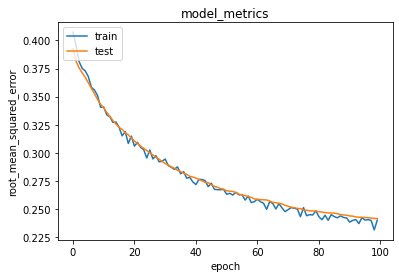

In [ ]:
plt.plot(history.history['root_mean_squared_error'])
plt.plot(history.history['val_root_mean_squared_error'])
plt.title('model_metrics')
plt.ylabel('root_mean_squared_error')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
resto_df = resto_new
df = pd.read_csv('rating_final.csv')

# Mengambil sample user
user_id = df.userID.sample(1).iloc[0]
resto_visited_by_user = df[df.userID == user_id]

# Operator bitwise
resto_not_visited = resto_df[~resto_df['id'].isin(resto_visited_by_user.placeID.values)]['id']

resto_not_visited = list(
    set(resto_not_visited)
    .intersection(set(resto_to_resto_encoded.keys()))
)

resto_not_visited = [[resto_to_resto_encoded.get(x)] for x in resto_not_visited]

In [ ]:
user_encoder = user_to_user_encoded.get(user_id)
user_resto_array = np.hstack(
    ([[user_encoder]] * len(resto_not_visited), resto_not_visited)
)

In [ ]:
ratings = model.predict(user_resto_array).flatten()

top_ratings_indices = ratings.argsort()[-10:][::-1]
recommended_resto_ids = [
                         resto_encoded_to_resto.get(resto_not_visited[x][0]) for x in top_ratings_indices
]

print("Showing recommendations for users: {}".format(user_id))
print("===" * 9)
print("Resto with high ratings from user")
print("----" * 8)

top_resto_user = (
    resto_visited_by_user.sort_values(
        by = 'rating',
        ascending=False
    )
    .head(5)
    .placeID.values
)

resto_df_rows = resto_df[resto_df['id'].isin(top_resto_user)]
for row in resto_df_rows.itertuples():
  print(row.resto_name, ":", row.cuisine)

print("----" * 8)
print("Top 10 resto recommendation")
print("----" * 8)

recommended_resto = resto_df[resto_df['id'].isin(recommended_resto_ids)]
for row in recommended_resto.itertuples():
  print(row.resto_name, ":", row.cuisine)

Showing recommendations for users: U1052
Resto with high ratings from user
--------------------------------
KFC : American
Chaires : Cafeteria
Dominos Pizza : Pizzeria
Tortas y hamburguesas el gordo : Burgers
--------------------------------
Top 10 resto recommendation
--------------------------------
La Estrella de Dimas : Mexican
La Posada del Virrey : International
cafe punta del cielo : Cafeteria
emilianos : Bar_Pub_Brewery
Restaurant Las Mananitas : International
Michiko Restaurant Japones : Japanese
Restaurant Bar Hacienda los Martinez : Bar
Restaurante la Parroquia Potosina : Contemporary
Mariscos El Pescador : Seafood
Cafeteria cenidet : Cafeteria
